# Assignment (Healthcare and Artificial Intelligence)
The objective of this assignment is to get you familiarize with  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://iiitaphyd-my.sharepoint.com/personal/manasa_k_research_iiit_ac_in/_layouts/15/onedrive.aspx?ct=1622206906840&or=OWA).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `name.ipynb` and submit the notebook file on Github Repo with plots/vizualizations saved.


In [7]:
# Installing Libraries
#!pip install scikit-learn matplotlib Pillow

In [39]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [9]:
opt = {
    'image_size': 32,
    'is_grayscale': True,
    'val_split': 0.75
}

### Load Dataset

In [10]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [11]:
# Loading the dataset
# eg.
dirpath = '/content/drive/MyDrive/dataset/IMFDB'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32)


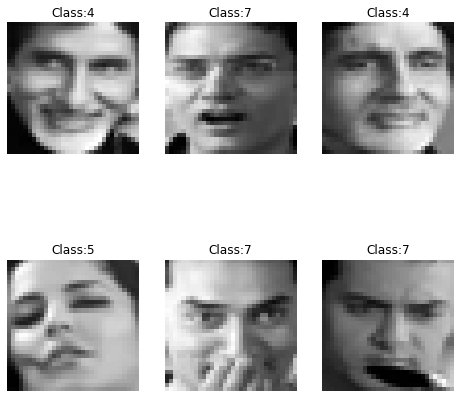

In [12]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

In [13]:
dirpath = '/content/drive/MyDrive/dataset/IIIT-CFW'
X_1,y_1 = load_data(dirpath)
N_1,H_1,W_1 = X_1.shape[0:3]
C = 1 if opt['is_grayscale'] else X_1.shape[3]

Dataset shape: (672, 32, 32)


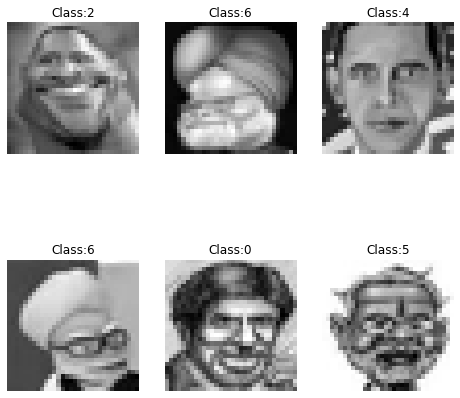

In [14]:
# Show sample images
ind = np.random.randint(0,y_1.shape[0],6)
disply_images(X_1[ind,...],y_1[ind], row=2,col=3)

In [15]:
dirpath = '/content/drive/MyDrive/dataset/Yale_face_database'
X_2,y_2 = load_data(dirpath)
N_2,H_2,W_2 = X_2.shape[0:3]
C = 1 if opt['is_grayscale'] else X_2.shape[3]

Dataset shape: (165, 32, 32)


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


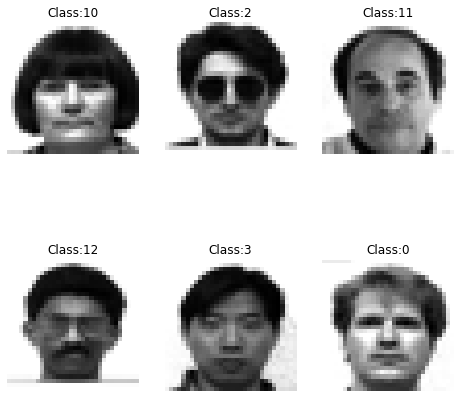

In [17]:
# Show sample images
ind = np.random.randint(0,y_2.shape[0],6)
disply_images(X_2[ind,...],y_2[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features


---


In [18]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [19]:
X_1 = X_1.reshape((N_1,H_1*W_1*C))

In [20]:
X_2 = X_2.reshape((N_2,H_2*W_2*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [21]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    if k>X.shape[0]:
        k=X.shape[0]
    
    pca = PCA(n_components=k, whiten=True ,svd_solver='randomized')
    pca.fit(X)
    X_k = pca.transform(X)
 
    return X_k 
    

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [22]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    if k>X.shape[0]:
        k=X.shape[0]

    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    kpca.fit(X)
    X_k = kpca.transform(X)

    return X_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.


Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [51]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    component = X.shape[0] - np.unique(y).shape[0]
    pca = PCA(n_components=component)
    pca.fit(X)
    pcaX = pca.transform(X)
    lda.fit(pcaX, y)
    ldaPCA = lda.transform(pcaX)
    if k<7 and k>1:
      X_k = np.copy(ldaPCA[:,:])
      X_k[k:] = 0
    else:   
      X_k = np.copy(ldaPCA[:,:])

    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [40]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    lda = LDA(n_components=k)
    component = X.shape[0] - np.unique(y).shape[0]
    kpca = KernelPCA(n_components=component,kernel=kernel,degree=degree)
    kpca.fit(X)
    kpcaX = kpca.transform(X)
    lda.fit(kpcaX, y)
    ldaKPCA = lda.transform(kpcaX)

    X_k = np.copy(ldaKPCA[:,:])

    
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.


In [25]:
def get_vgg_features(dirpath):
    
    data = np.load(dirpath)
    features = pd.DataFrame(data)
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 



In [26]:
def get_resnet_features(dirpath):
    
    data = np.load(dirpath)
    features = pd.DataFrame(data)
    return features

In [27]:

def database_comp(data_X):

    X_meaned = data_X - np.mean(data_X , axis = 0)
    cov = np.cov(X_meaned,rowvar = False) 
    print("Covariance Shape =",np.shape(cov))               #----------------------- covariance 

    eigvals, eigvectors = np.linalg.eig(cov)  
    components = eigvals.shape[0]

    print("Total Eigen Values  =",components)        #----------------------- Total Eigen Values

    sorted_val = np.argsort(eigvals)[::-1]
    sorted_evals = eigvals[sorted_val]
    sorted_evecs = eigvectors[:,sorted_val]


    comp_var_95 =0
    flag =0

    teval = np.sum(np.real(eigvals))
    explained_variance = []

    for i in range(X.shape[1]+1):
        evals = sorted_evals[:i]         
        evecs = sorted_evecs[:, :i]   
        explained_variance.append(np.sum(evals)/teval)

        if (np.sum(evals)/teval) >=.95 and flag ==0:
            comp_var_95 =i
            print("No. Of Eigenvector corresponding to 95% Variance = ",comp_var_95)
            flag = 1
            print("Variance Retained @ ",i," = " ,np.real(explained_variance[i]*100),"%")


In [28]:

#database_comp(X)
#database_comp(X_1)

database_comp(X_2)

Covariance Shape = (1024, 1024)
Total Eigen Values  = 1024
No. Of Eigenvector corresponding to 95% Variance =  38
Variance Retained @  38  =  95.00141395325392 %


# Questions

1(a). What are eigen faces? 


In [29]:
from sklearn import decomposition
from sklearn.decomposition import PCA



#----> Change value of database acording to  description given below
#Indian Movie Face Database = X
#IIIT Cartoon Face Dataset = X_1
#Yale Face Database = X_2

database = X                                                                #change value for different database 
database_y = y
component = min(database.shape[0],database.shape[1])
print("Shape Of Database = ",database.shape)
print("Number of Component used = ",component)
pca = decomposition.PCA(n_components=component, whiten=True)
pca.fit(database)                                                                                 
X_k = pca.transform(database)
print("------------------")
print("X_k Shape = " , X_k.shape)

Shape Of Database =  (400, 1024)
Number of Component used =  400
------------------
X_k Shape =  (400, 400)


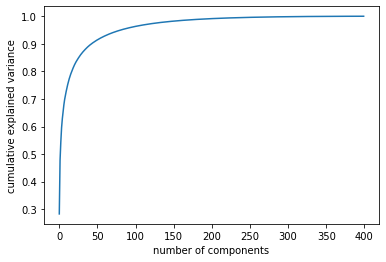

In [30]:
import seaborn as sns; 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

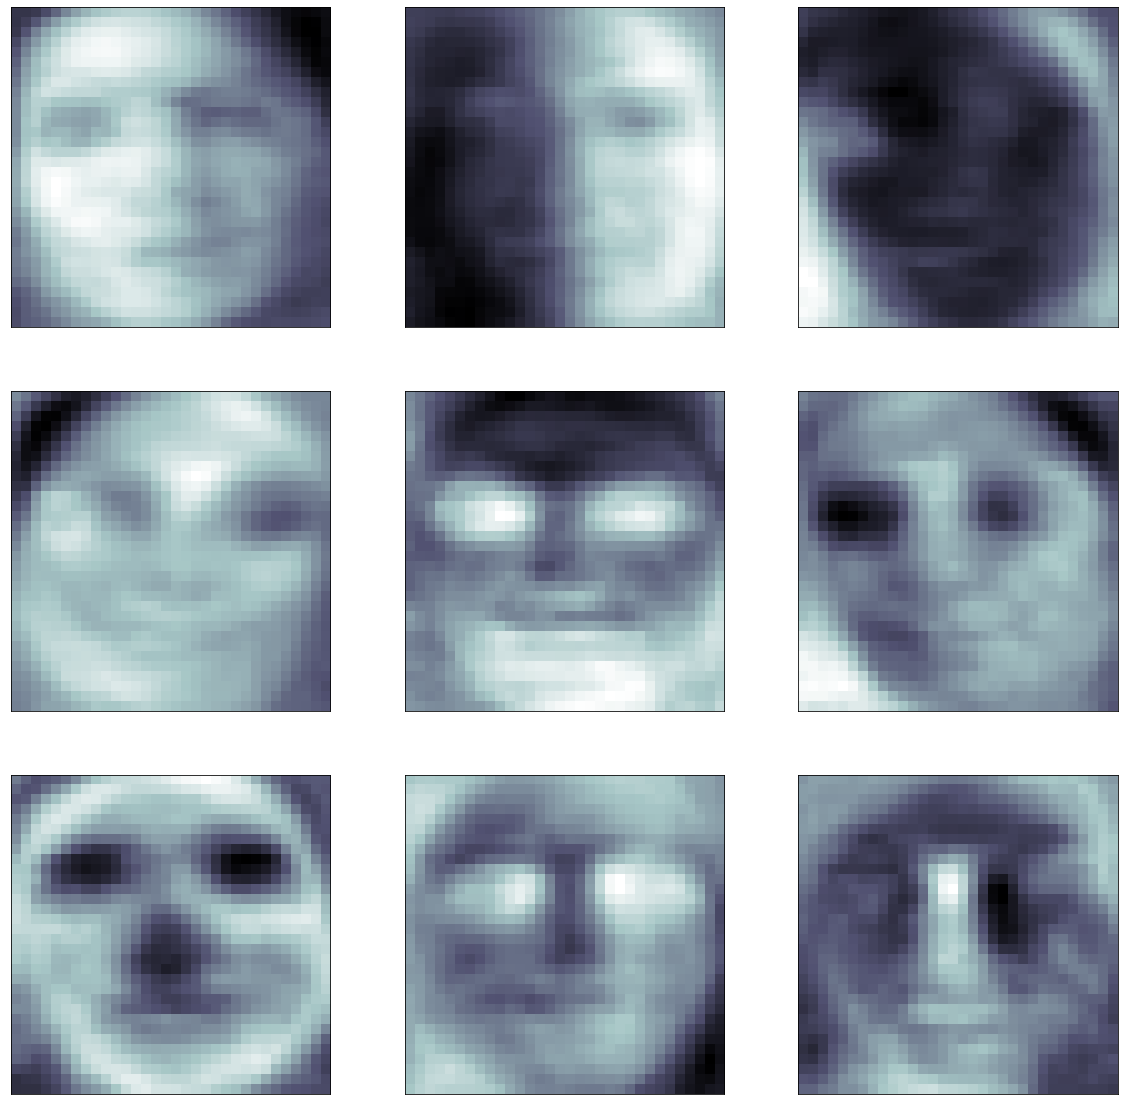

In [31]:
fig = plt.figure(figsize=(20, 20))
for i in range(9):
    ax = fig.add_subplot(3,3, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((opt['image_size'], opt['image_size'])),
              cmap=plt.cm.bone)

1(b). How many eigen vectors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples and make a convincing argument.
   

In [32]:

def recon_comp_img(X,y):
    classes = {}
    t_class = np.unique(y).shape[0]
    print("Total No. Of Classes = ",t_class)

    for i in range(0,t_class):
        classes[i] = X[np.where(y==i)]

    #No need of mean as its anyway the common among all figures
    print("Shape Of Class = " ,classes[1].shape)

    for c in classes:
        cov = np.cov(classes[c].T)
        eigvals, eigvectors = np.linalg.eig(cov)
        print("For Class ",c)
        eigvals, eigvectors = np.linalg.eig(cov) 
        full = np.sum(np.real(eigvals[:1024]))

        comp_var_95 =0
        flag =0

        teval = np.sum(np.real(eigvals[:1024]))


        for i in range(classes[c].shape[1]):
            evals = eigvals[:i]
            evecs = eigvectors[:, :i]
            #print(i, np.sum(np.real(s_vals))/teval) 
            if (np.sum(evals)/teval) >=.95 and flag ==0:
                comp_var_95 =i
                print("No. Of Eigenvector corresponding to 95% Variance = ", comp_var_95)
                flag = 1
                #print(i, np.sum(s_vals)/teval)  #check explained_variance_
                print("Variance Retained @ ",i," = " ,np.real(np.sum(evals)/teval)*100,"%")

        print(" ------- ")
    

In [33]:
#This function returns no. of components required by each class to capture 95% of variation

#----> Change value of database acording to  description given below
#Indian Movie Face Database = X
#IIIT Cartoon Face Dataset = X_1
#Yale Face Database = X_2

#recon_comp_img(X,y)
#recon_comp_img(X_1,y_1)
recon_comp_img(X_2,y_2)

Total No. Of Classes =  15
Shape Of Class =  (11, 1024)
For Class  0
No. Of Eigenvector corresponding to 95% Variance =  6
Variance Retained @  6  =  95.88741917731608 %
 ------- 
For Class  1
No. Of Eigenvector corresponding to 95% Variance =  6
Variance Retained @  6  =  97.10417512479694 %
 ------- 
For Class  2
No. Of Eigenvector corresponding to 95% Variance =  6
Variance Retained @  6  =  96.54048142806106 %
 ------- 
For Class  3
No. Of Eigenvector corresponding to 95% Variance =  5
Variance Retained @  5  =  95.39342508095187 %
 ------- 
For Class  4
No. Of Eigenvector corresponding to 95% Variance =  4
Variance Retained @  4  =  95.24592222277951 %
 ------- 
For Class  5
No. Of Eigenvector corresponding to 95% Variance =  5
Variance Retained @  5  =  95.58652736183213 %
 ------- 
For Class  6
No. Of Eigenvector corresponding to 95% Variance =  6
Variance Retained @  6  =  95.62940116196512 %
 ------- 
For Class  7
No. Of Eigenvector corresponding to 95% Variance =  6
Variance 

1(c). Reconstruct  the  image  back for each case


In [34]:
def reconstruct_images(eigenvectors_no, X_k):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    no_of_eigenvectors = eigenvectors_no
    pc = np.copy(X_k[:])
    pc[no_of_eigenvectors:] = 0
   
    X_orig = pca.inverse_transform(pc)
    
    reconstruct_X = X_orig
    
    return reconstruct_X       

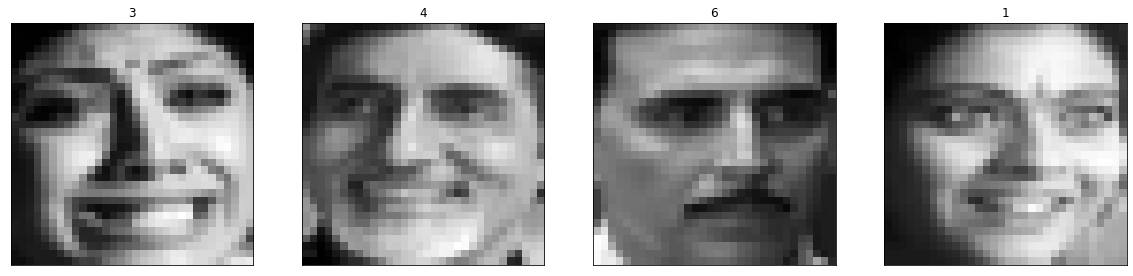

In [35]:
#Plotting Face
def plt_face(x):
    h =opt['image_size']
    w =opt['image_size']
    plt.imshow(x.reshape((opt['image_size'], opt['image_size'])), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.randint(0,database.shape[0],4)    
plt.figure(figsize=(20,20))
nplt = 4;
for i in range(nplt):    
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(database[ind])
    plt.title(database_y[ind])
    format(database[ind])

Class = [4 6]
Image = 
Class = [4 6]
Image = 


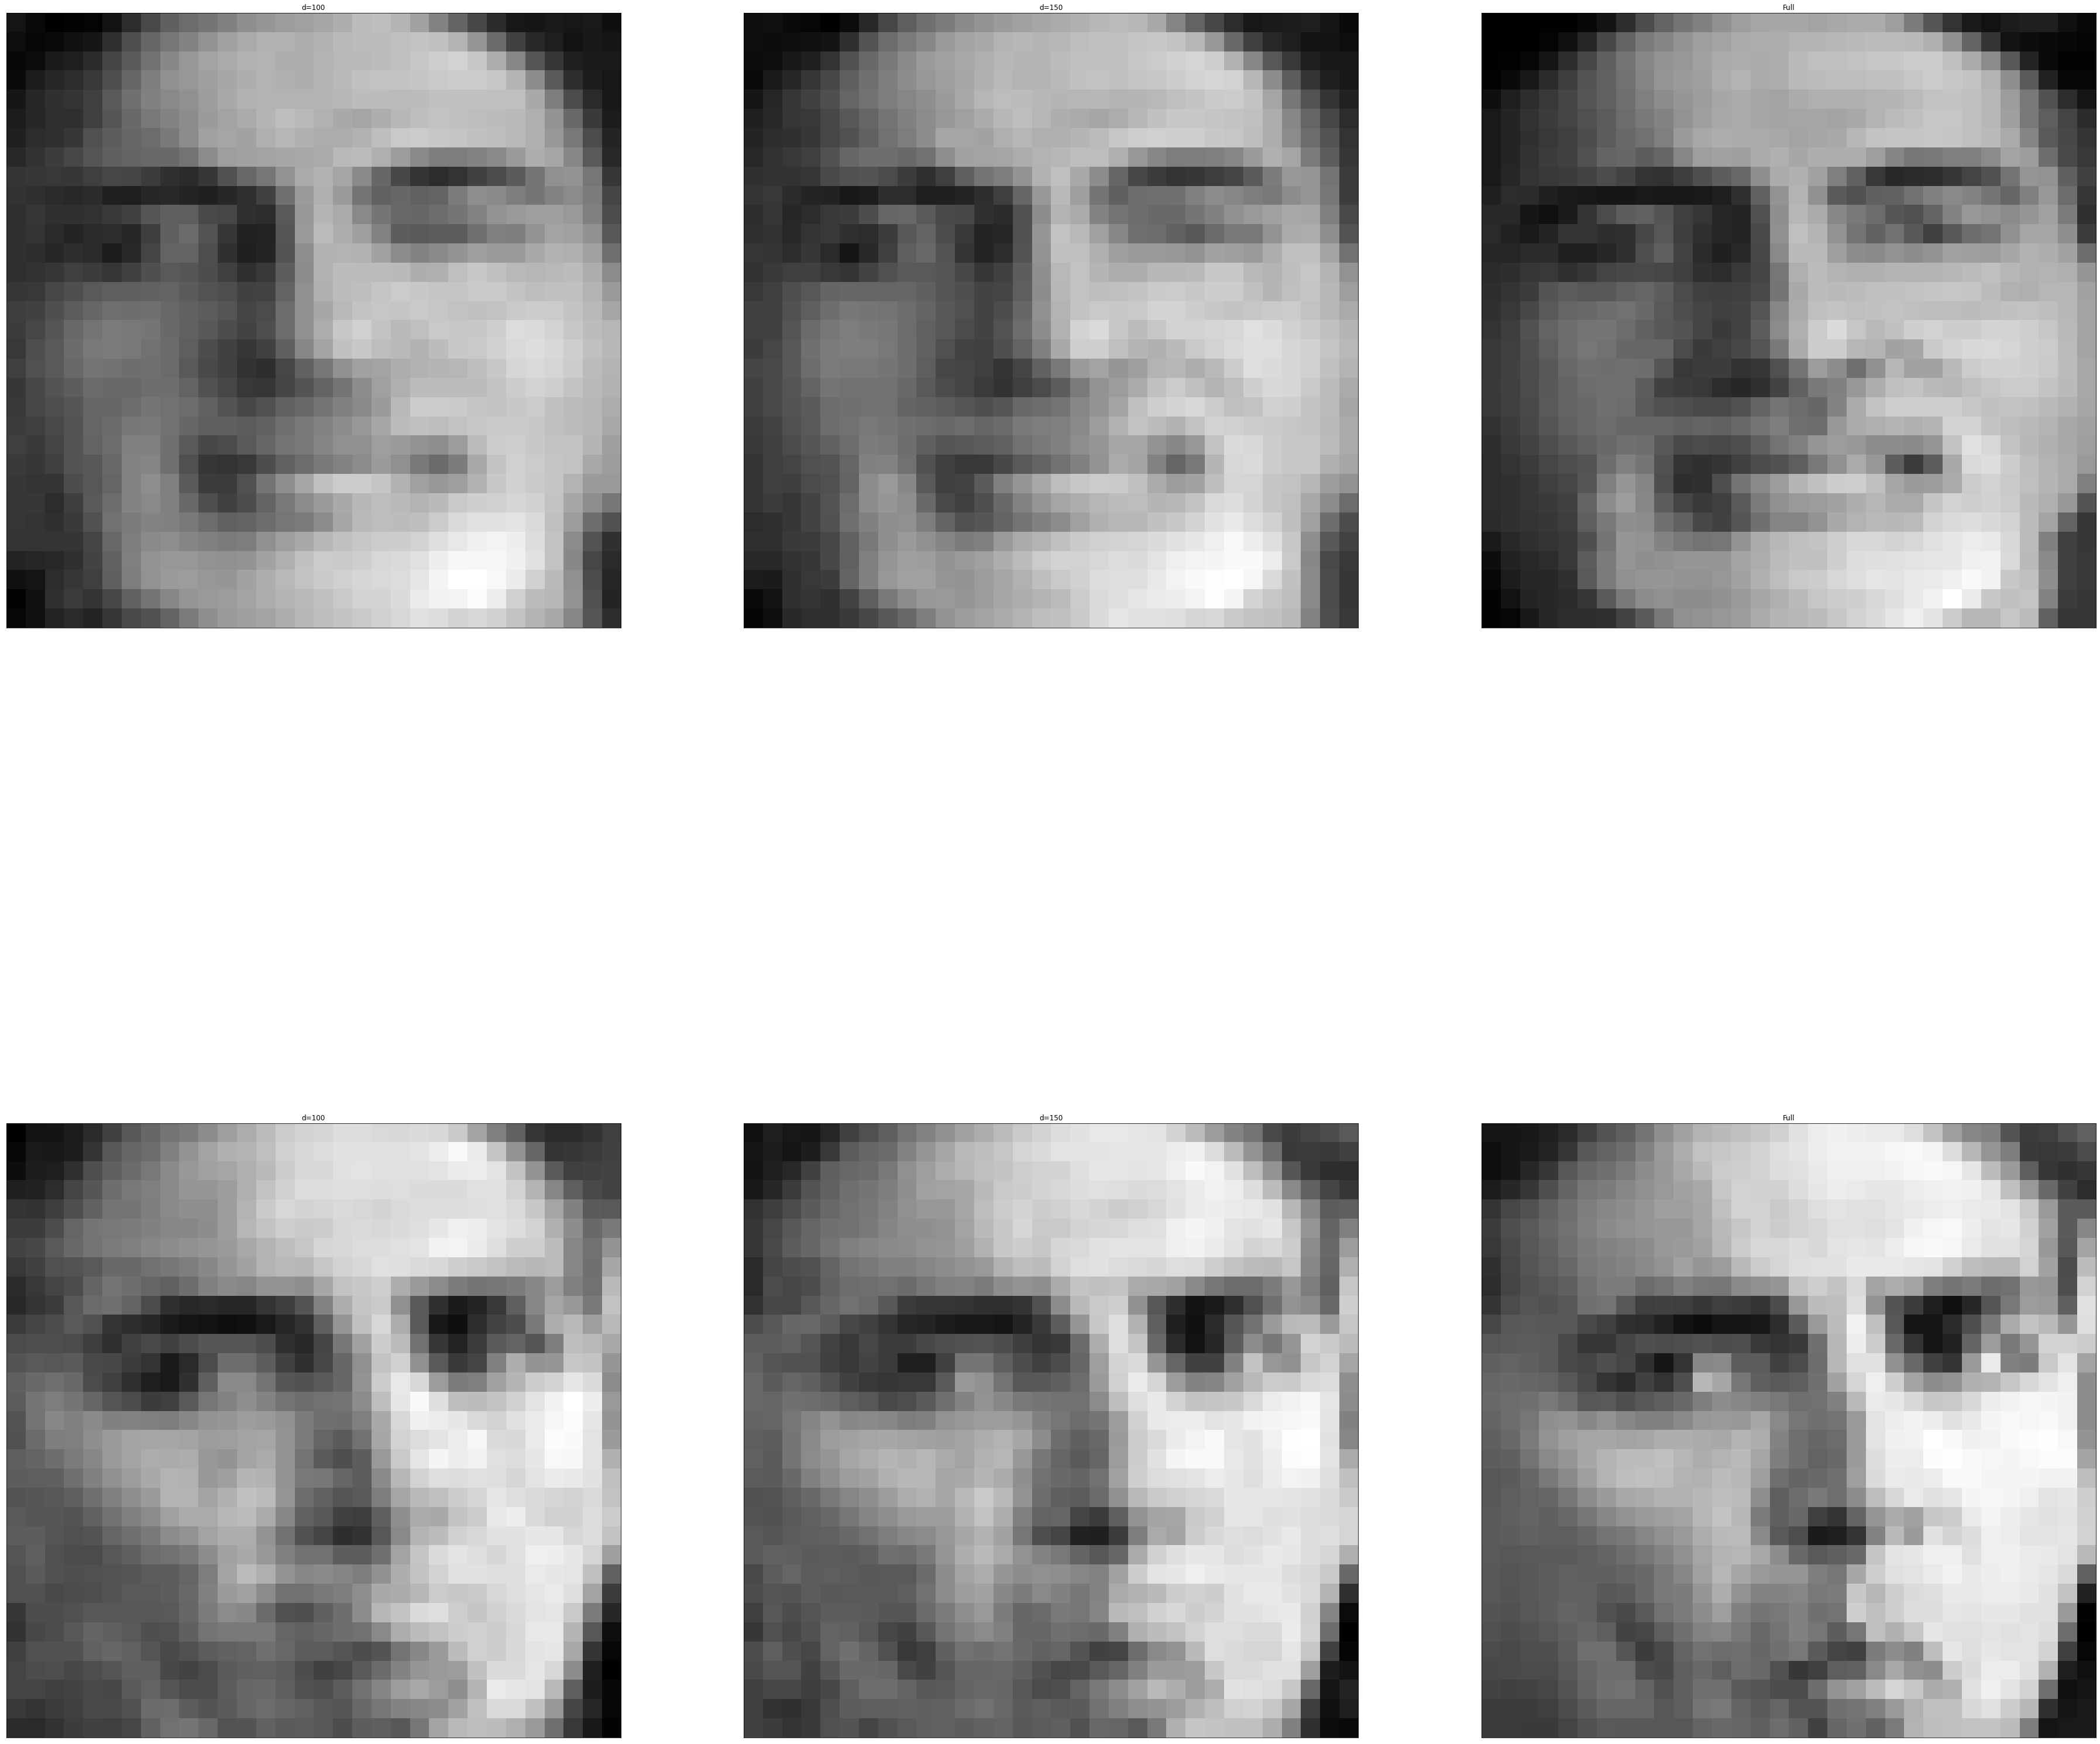

In [36]:
ds = [100,150]   # number of principle components used for reconstruction   ##change value for different results
nplt = 2               # number of faces to plot

# Select random faces
inds = np.random.randint(0,165,15)              #Change value for different dataset and image class
inds = inds[:nplt]
nd = len(ds)
iplt = 0

plt.figure(figsize=(64,64))

for ind in inds:
    print("Class =" , database_y[inds])
    print("Image = ")
    for d in ds:
        plt.subplot(nplt,nd+1,iplt+1)
        
        X_rcnst_orig = reconstruct_images(d, X_k[ind]) 
        
        plt_face(X_rcnst_orig)
        plt.title('d={0:d}'.format(d))
        iplt += 1
    # Plot Original face
    plt.subplot(nplt,nd+1,iplt+1)
    plt_face(database[ind,:])
    plt.title('Full')
    iplt += 1

In [37]:
#  splitting data for better approximation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

def recosn_errorr(X,z,comp):
    database = X                                                                 
    component = min(database.shape[0],database.shape[1])

    pca = PCA(n_components=comp, whiten=True)
    
    x_train, x_test, y_train, y_test = train_test_split(database,z,stratify =z, test_size=0.25, random_state=42)
    
    pca.fit(x_train)                                                                                 
    x_train_tr = pca.transform(x_train)
    x_test_tr = pca.transform(x_test)

    no_of_eigenvectors = comp
    pc = np.copy(x_test[:])
    pc[no_of_eigenvectors:] = 0

    X_orig = pca.inverse_transform(x_test_tr)

    r_2 = r2_score(x_test,X_orig)
    rmse = sqrt(mean_squared_error(x_test,X_orig))
   
    
    
    print("R2 = ",r_2)
    print("RMSE = ",rmse)
  

In [42]:
#This gives reconstruction error.
#last paramere is no of component used for recounstruction of image.
#here data split is hapening with test size = 25% . Use appropriate value of no. of components
#for X  it should be <= 100
#for X_1 it should be <=504
#for x_2 it should be <= 123

#recosn_errorr(X_1,y_1,504)
#recosn_errorr(X_2,y_2,123)
recosn_errorr(X,y,60)

R2 =  0.8776825542936548
RMSE =  0.059329732630840334


1(d). Which person/identity is difficult to represent compactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers
 

2(a) Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. Write code from scratch making Classifer as a class and functions of training, validation and confusion matrix etc.

2(b) Which method works well? Do a comparitive study. 



In [43]:
import sklearn
from sklearn.neural_network import MLPClassifier as MLP
from keras import optimizers



class Classifier():
    def __init__(self, X_train):

        model = MLP(hidden_layer_sizes=(64,),max_iter =5000)
        self.model = model
     
    
    def train(self,X_train,y_train):

        self.model.fit(X_train, y_train)
        
    def validate(self,X_val,y_val):

        y_pred = self.model.predict(X_val)
        classification_report = sklearn.metrics.classification_report(y_val, y_pred)

        return classification_report

    def classify(self,X):
        
        predict = self.model.predict(X)
        return predict

    def confusion_matrix(self,pred,y):

        confusion_matrix = sklearn.metrics.confusion_matrix(y, pred)
        return confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split

#dataset  IIIT-CFW : (X_1,y_1)
#dataset 

#data = get_pca(X_1,291)
#data = get_kernel_pca(X_1, 291,kernel='linear', degree=3)
#data = get_lda(X_1,y_1,7)
#data = get_kernel_lda(X_1,y_1, 7,kernel='linear', degree=3)
#data = get_vgg_features('/content/drive/MyDrive/dataset/IIIT-CFW/VGG19_features.npy')
#data = get_resnet_features('/content/drive/MyDrive/dataset/Yale_face_database/resnet50_features.npy')

def results(X,y,feature,k,path):
      
      print("No of samples in X = ",X.shape[0])
      
      if (feature == 'pca'):
        data =get_pca(X,k)
        print("Doing PCA")
      elif (feature == 'kpca'):
        data = get_kernel_pca(X, k,kernel='rbf', degree=3)
        print("Doing Kernel PCA")
      elif (feature == 'lda'):
        print("Doing LDA")
        data = get_lda(X,y,k)
      elif (feature =='klda'):
        data = get_kernel_lda(X,y,k,kernel='rbf', degree=3)
        print("Doing Kernel LDA")
      elif (feature == 'vgg'):
        data = get_vgg_features(path)
        print("Doing VGG")
      elif (feature == 'resnet'):
        data = get_resnet_features(path)
        print("Doing Resnet")
      else :
        print("Not a valid entry")
   
   
      X_train, X_test, y_train, y_test = train_test_split(data,y,stratify =y, test_size=0.25, random_state=42)   

      

      clf = Classifier(X_train)
      clf.train(X_train, y_train)
      class_report = clf.validate(X_test, y_test)
      conf = clf.confusion_matrix(clf.classify(X_test),y_test)
      print(class_report)
      #print(conf)
  
      plt.title('Confusion Matrix Of The Classifier')
      sns.heatmap(conf,annot=True)
      plt.xlabel('Predicted')
      plt.ylabel('True')
      plt.show()
      




No of samples in X =  400
Doing LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        12

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



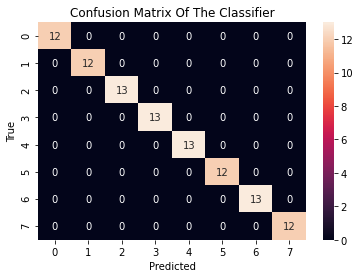

In [48]:
#  IMFDB IIIT-CFW  Yale_face_database  VGG19_features.npy   resnet50_features.npy
#NOTE:while changing path change y value also 
#K is number of principal components
#change X,y , feature and path value for different datasets and features
#path is requires for VGG and Resnest

path = '/content/drive/MyDrive/dataset/IMFDB/resnet50_features.npy'
feature = 'lda'
K = 7
np.random.seed(0)
#results(X_2,y_2,feature,K,path)                    
#results(X_1,y_1,feature,K,path)
results(X,y,feature,K,path)

3.Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? 

In [ ]:
import time
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
def tsne(data_x,perplexity,iteration):
    
    
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=iteration)
    tsne_results = tsne.fit_transform(data_x)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    return tsne_results

In [ ]:
def plot_tsne(data_transformed, data_y):
    total_class = np.unique(data_y).shape[0]
    palette = sns.color_palette("bright", total_class)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(data_transformed[:,0], data_transformed[:,1], hue=data_y, legend='full', palette=palette)

In [ ]:
#----> Change value of database acording to  description given below
#Indian Movie Face Database = X,y      use = p =5
#IIIT Cartoon Face Dataset = X_1,y_1   use p =15
#Yale Face Database = X_2,y_2       use p= 6

X_tsne =X                                                     
y_tsne = y
p=5
dataset_X_tsne_transformed = tsne(X_tsne,p,5000)
plot_tsne(dataset_X_tsne_transformed,y_tsne)

In [ ]:
#LDA and t-SNE
X_tsne =get_lda(X,y,50)                                                     
y_tsne = y
p=5
dataset_X_tsne_transformed = tsne(X_tsne,p,5000)
plot_tsne(dataset_X_tsne_transformed,y_tsne)

In [ ]:
#Combined Plot
X_com = np.concatenate([X, X_1, X_2], axis=0)
y_com = np.concatenate([y, y_1, y_2], axis=0)

X_tsne =X_com                                                   
y_tsne = y_com
p=50
dataset_X_tsne_transformed = tsne(X_tsne,p,5000)
plot_tsne(dataset_X_tsne_transformed,y_tsne)

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

4(c)Show empirical results  with  all  the  representations

In [52]:
# plot
#import matplotlib.patches as mpatches
#from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier as KNN   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [53]:
def knn(dataset_X,dataset_Y,neighbours):
    
    neighbours +=1
    neighbours_arr = range(1,neighbours)
    
    test_error_knn = []
    test_accu_knn = []


    x_train, x_test, y_train, y_test = train_test_split(dataset_X, dataset_Y,stratify =dataset_Y, test_size=0.25, random_state=43)    ### stratify =y,

    for k in neighbours_arr:
        knn = KNN(n_neighbors=k,p=2,weights='uniform')
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error_knn.append(test_scores)
        test_accu_knn.append(1 - test_scores)

        
    test_knn = pd.DataFrame(test_accu_knn).T
    test_knn.columns = range(1,neighbours)
    round(test_knn,4)
    print("KNN ACCURACY = ",test_accu_knn)

    
    return test_accu_knn ,neighbours-1

In [54]:
def plot_knn(test_accu_knn,neighbours):
    
    neighbours += 1
    neighbours_arr = range(1,neighbours)
    sns.set_style('whitegrid')
    plt.xticks(neighbours_arr)

 
    knn, = plt.plot(neighbours_arr,test_accu_knn,color='darkorange', linestyle='solid', linewidth = 2,marker='o',
             markerfacecolor='black', markersize=5)

    plt.title('KNN Test Accuracy vs. K Value')
    plt.xlabel('K - Value')
    plt.ylabel('Accuracy Rate')

    plt.show()

KNN ACCURACY =  [0.8809523809523809, 0.8809523809523809, 0.8809523809523809, 0.8571428571428571, 0.8809523809523809, 0.8571428571428571, 0.8809523809523809, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.8095238095238095, 0.7380952380952381, 0.7142857142857143, 0.7142857142857143, 0.6904761904761905, 0.6428571428571429, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


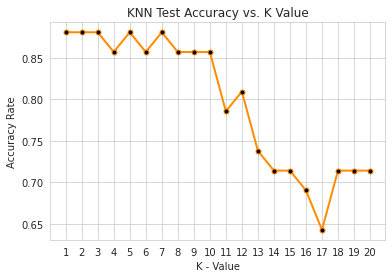

In [55]:
#test_acc,neighbour =knn(X,y,neighbours=20)
#test_acc,neighbour =knn(X_1,y_1,neighbours=20)

test_acc,neighbour =knn(X_2,y_2,neighbours=20)
plot_knn(test_acc,neighbour)